# Deep Convolutional Generative Adversarial Networks (DCGAN)

A model skeleton for Generative Adversarial Networks (GAN)s. It was first introduced in the paper titled *[Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)* by Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio.

> A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in June 2014. Two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss).

> Given a training set, this technique learns to generate new data with the same statistics as the training set. For example, a GAN trained on photographs can generate new photographs that look at least superficially authentic to human observers, having many realistic characteristics. Though originally proposed as a form of generative model for unsupervised learning, GANs have also proved useful for semi-supervised learning, fully supervised learning, and reinforcement learning.

> The core idea of a GAN is based on the "indirect" training through the discriminator, another neural network that can tell how "realistic" the input seems, which itself is also being updated dynamically. This means that the generator is not trained to minimize the distance to a specific image, but rather to fool the discriminator. This enables the model to learn in an unsupervised manner.

> GANs are similar to mimicry in evolutionary biology, with an evolutionary arms race between both networks.

## usage

In [1]:
class norm:
    def fit_transform(self, image):
        return (tf.cast(image, tf.float32) - 127.5) / 127.5
    
    def inverse_transform(self, image):
        return (tf.cast(image, tf.float32) * 127.5) + 127.5
    
scaler = norm()

In [2]:
import deeply
gan = deeply.hub("dcgan", x = 28, decoder_batch_norm = True, encoder_dropout_rate = 0.3,
                 encoder_layer_growth_rate = 2,
                 init_decoder_units = 256, decoder_layer_growth_rate = 0.5, kernel_size = 5,
                 decoder_strides  = [1, 2], scaler = scaler,
                 final_activation = "tanh")

## example

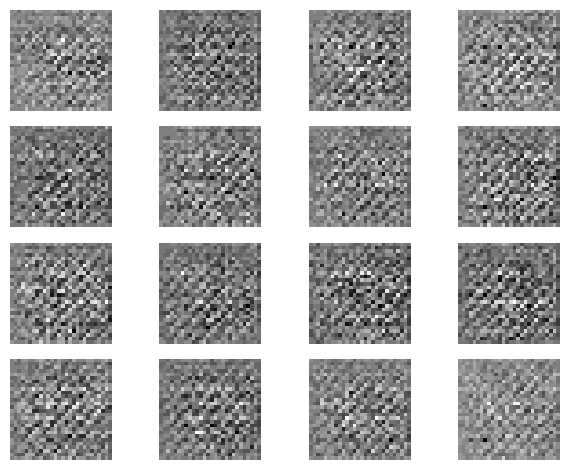

  2/137 [..............................] - ETA: 6:52

In [ ]:
import tensorflow as tf
import deeply.datasets as dd

config = dict(batch_size = 512, epochs = 50)

mnist = dd.load("mnist", shuffle_files = True, as_supervised = True)
data  = dd.concat((mnist["train"], mnist["test"]), mapper = lambda image, label: scaler.fit_transform(image))

batch = data.prefetch(dd.length(data)).batch(config["batch_size"])

history = gan.fit(batch, **config)